# Speaker Recognition via Spectrogram Analysis

# Import libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ffmpeg

  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=e20d216c634f9096c67e360455527214d322e18bde8a386683cf39714947af5c
  Stored in directory: /root/.cache/pip/wheels/64/80/6e/caa3e16deb0267c3cbfd36862058a724144e19fdb9eb03af0f
Successfully built ffmpeg


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import fastai
from fastai.vision import *
fastai.__version__

'1.0.61'

In [4]:
import os
DATASET_ROOT = '/content/drive/MyDrive/Colab Notebooks/GBCLessons/Math 2/classifier/Data'

SPECTROGRAM_SUBFOLDER = 'spectrograms'

SPECTROGRAM_PATH = os.path.join(DATASET_ROOT, SPECTROGRAM_SUBFOLDER)
TRAIN_PATH = os.path.join(SPECTROGRAM_PATH, 'train')
VALID_PATH = os.path.join(SPECTROGRAM_PATH, 'valid')

In [5]:
data = (ImageList.from_folder(SPECTROGRAM_PATH)
    .split_by_folder()
    .label_from_re(r'(\w+)_\w+.png$')
    .databunch())

In [6]:
data.c, data.classes

(5, ['Dan', 'Ed', 'Hom', 'Juan', 'Mike'])

In [7]:
xs, ys = data.one_batch()
xs.shape, ys.shape

(torch.Size([64, 3, 128, 44]), torch.Size([64]))

In [8]:
xs.min(), xs.max(), xs.mean(), xs.std()

(tensor(0.0039), tensor(0.9922), tensor(0.3650), tensor(0.1928))

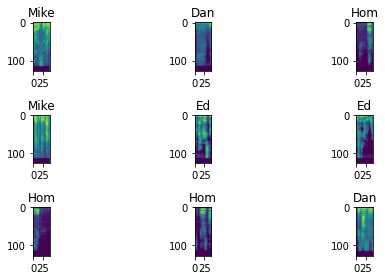

In [9]:
data.show_batch(3, figsize=(8,4), hide_axis=False)

In [10]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.685456,1.895888,0.472727,02:32
1,1.031892,0.738906,0.742857,00:05
2,0.722963,0.566617,0.802597,00:02


In [11]:
interp = ClassificationInterpretation.from_learner(learn)

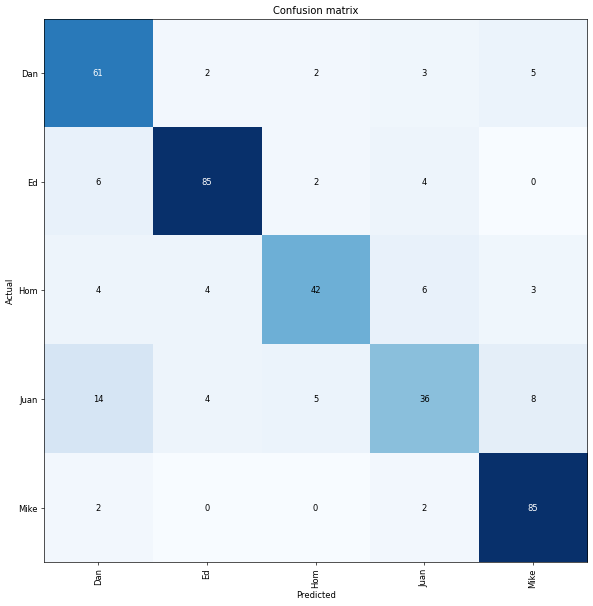

In [12]:
interp.plot_confusion_matrix(figsize=(10, 10), dpi=60)

In [13]:
interp.most_confused(min_val=1)

[('Juan', 'Dan', 14),
 ('Juan', 'Mike', 8),
 ('Ed', 'Dan', 6),
 ('Hom', 'Juan', 6),
 ('Dan', 'Mike', 5),
 ('Juan', 'Hom', 5),
 ('Ed', 'Juan', 4),
 ('Hom', 'Dan', 4),
 ('Hom', 'Ed', 4),
 ('Juan', 'Ed', 4),
 ('Dan', 'Juan', 3),
 ('Hom', 'Mike', 3),
 ('Dan', 'Ed', 2),
 ('Dan', 'Hom', 2),
 ('Ed', 'Hom', 2),
 ('Mike', 'Dan', 2),
 ('Mike', 'Juan', 2)]

In [14]:
learn.export(file = Path("/content/drive/MyDrive/Colab Notebooks/GBCLessons/Math 2/classifier/export.pkl"))